In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

In [2]:
sns.set(style = "whitegrid", palette = "muted", font_scale=1.1)

In [6]:
df = pd.read_csv('data/Coffe_sales.csv')

In [7]:
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
print(df.head())
print(df.info())

   hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3           13      card   28.9      Americano   Afternoon     Fri        Mar   
4           13      card   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort       Date             Time  
0            5          3 2024-03-01  10:15:50.520000  
1            5          3 2024-03-01  12:19:22.539000  
2            5          3 2024-03-01  12:20:18.089000  
3            5          3 2024-03-01  13:46:33.006000  
4            5          3 2024-03-01  13:48:14.626000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       ---

# 1. Анализ по месяцам

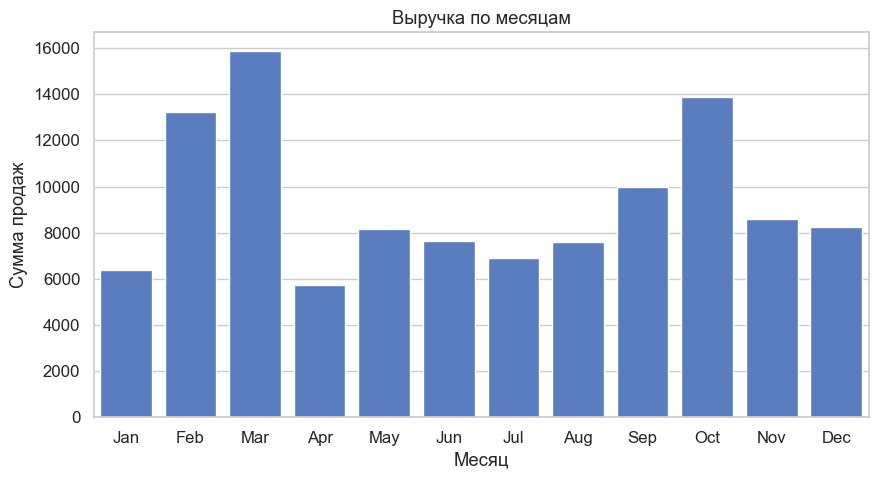

In [10]:
revenue_by_month = df.groupby("Month_name")["money"].sum().reindex([
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])

plt.figure(figsize=(10, 5))
sns.barplot(x=revenue_by_month.index, y=revenue_by_month.values)
plt.title("Выручка по месяцам")
plt.ylabel("Сумма продаж")
plt.xlabel("Месяц")
plt.show()

# 2. Средний чек по месяцам

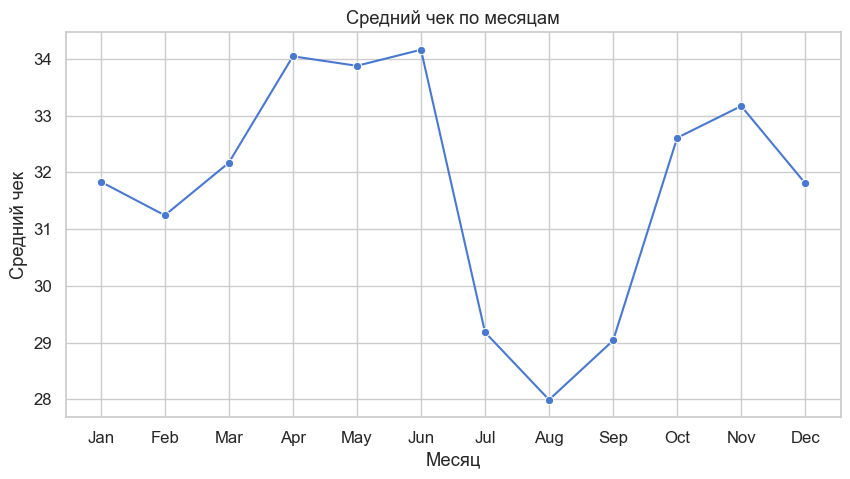

In [12]:
avg_check_by_month = df.groupby("Month_name")["money"].mean().reindex(revenue_by_month.index)

plt.figure(figsize=(10,5))
sns.lineplot(x=avg_check_by_month.index, y=avg_check_by_month.values, marker="o")
plt.title("Средний чек по месяцам")
plt.ylabel("Средний чек")
plt.xlabel("Месяц")
plt.show()

# 3. Выручка по дням недели

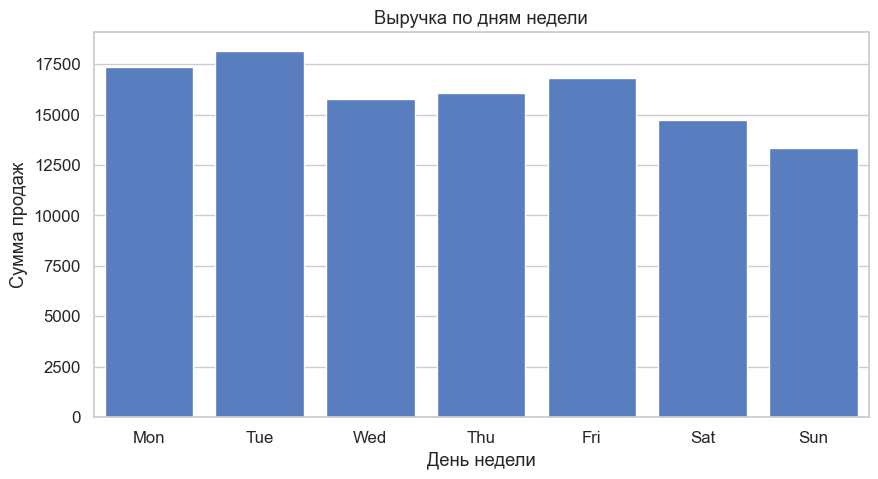

In [13]:
revenue_by_weekday = df.groupby("Weekday")["money"].sum().reindex(
    ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
)

plt.figure(figsize=(10,5))
sns.barplot(x=revenue_by_weekday.index, y=revenue_by_weekday.values)
plt.title("Выручка по дням недели")
plt.ylabel("Сумма продаж")
plt.xlabel("День недели")
plt.show()

# 4. Средний чек по дням недели

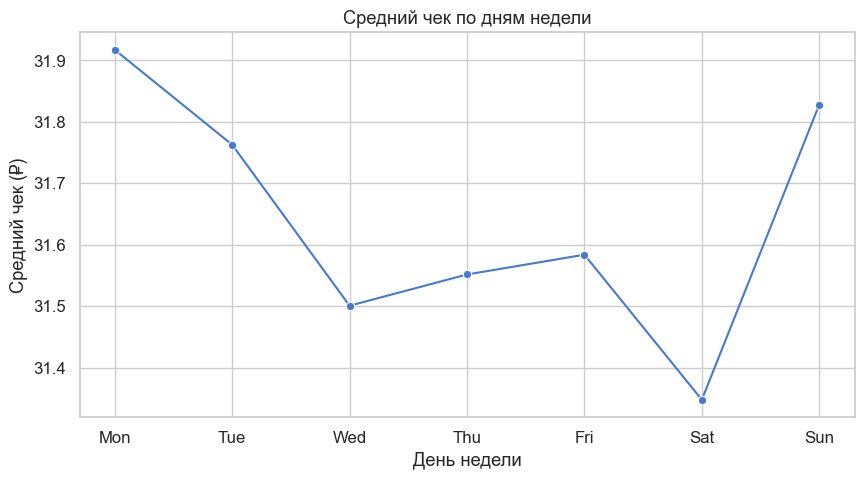

In [14]:
avg_check_by_weekday = df.groupby("Weekday")["money"].mean().reindex(revenue_by_weekday.index)

plt.figure(figsize=(10,5))
sns.lineplot(x=avg_check_by_weekday.index, y=avg_check_by_weekday.values, marker="o")
plt.title("Средний чек по дням недели")
plt.ylabel("Средний чек (₽)")
plt.xlabel("День недели")
plt.show()

# 5. Выручка по времени суток

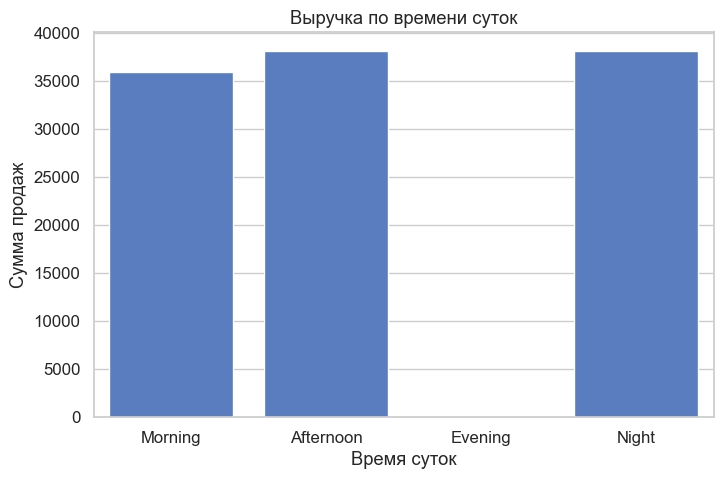

In [15]:
revenue_by_time = df.groupby("Time_of_Day")["money"].sum().reindex(["Morning", "Afternoon", "Evening", "Night"])

plt.figure(figsize=(8,5))
sns.barplot(x=revenue_by_time.index, y=revenue_by_time.values)
plt.title("Выручка по времени суток")
plt.ylabel("Сумма продаж")
plt.xlabel("Время суток")
plt.show()

# 6. Топ-10 напитков по выручке

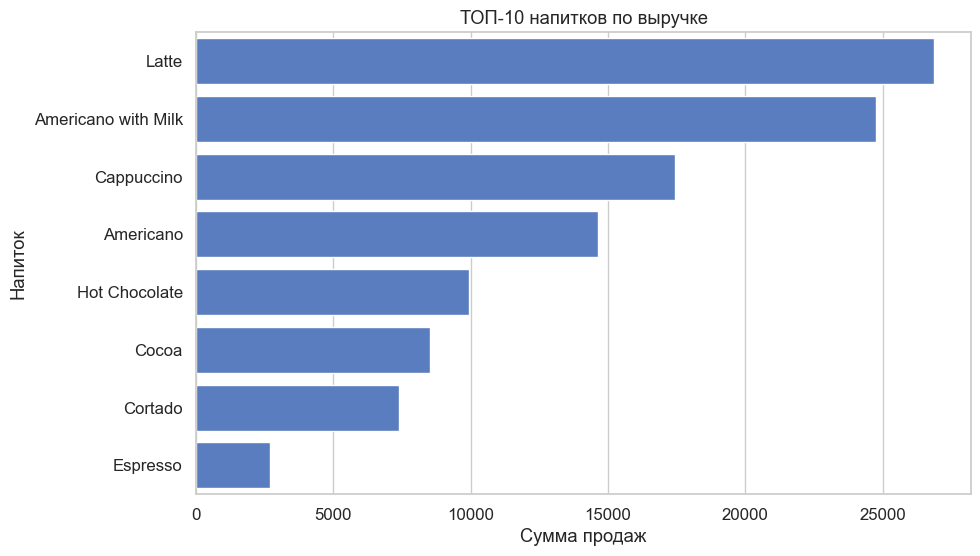

In [16]:
top_drinks = df.groupby("coffee_name")["money"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_drinks.index, x=top_drinks.values)
plt.title("ТОП-10 напитков по выручке")
plt.xlabel("Сумма продаж")
plt.ylabel("Напиток")
plt.show()

# Итоговые выводы

In [18]:
print("Итоговые наблюдения:")
print("- Больше всего выручки приходится на месяцы:", revenue_by_month.idxmax(), "и", revenue_by_month.idxmin(), "минимум.")
print("- Самый высокий средний чек наблюдается в месяце:", avg_check_by_month.idxmax())
print("- По дням недели: максимум продаж в", revenue_by_weekday.idxmax(), ", минимум — в", revenue_by_weekday.idxmin())
print("- По времени суток лидирует:", revenue_by_time.idxmax())
print("- Самый прибыльный напиток:", top_drinks.index[0])

Итоговые наблюдения:
- Больше всего выручки приходится на месяцы: Mar и Apr минимум.
- Самый высокий средний чек наблюдается в месяце: Jun
- По дням недели: максимум продаж в Tue , минимум — в Sun
- По времени суток лидирует: Night
- Самый прибыльный напиток: Latte
